### Packages

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import importlib, import_ipynb
import data_clean_order_combined as data
importlib.reload(data)
import tensorflow as tf
from tensorflow.data import experimental
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

importing Jupyter notebook from data_clean_order_combined.ipynb
Length of original data set 209527
Number of examples with no short description:  19712
Number of examples with no headline:  6


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stored 'test_df' (DataFrame)
Size of training data for combined:  167616
Size of testing data for combined:  41905
Stored 'rand_shuffled_text' (DataFrame)
Stored 'ordered_super_alpha_text' (DataFrame)
Stored 'ordered_class_alpha_text' (DataFrame)
Stored 'ordered_sem_clusters_desc_text' (DataFrame)
Stored 'ordered_sem_clusters_asc_text' (DataFrame)
Stored 'ordered_sem_clusters_shuffled_per_superclass_text' (DataFrame)


### Loading ordered data from data_clean_order_text.ipynb

In [26]:
%store -r rand_shuffled_text
%store -r ordered_super_alpha_text
%store -r ordered_class_alpha_text
%store -r ordered_sem_clusters_desc_text
%store -r ordered_sem_clusters_asc_text
%store -r ordered_sem_clusters_shuffled_per_superclass_text
%store -r test_df

In [27]:
ordered_sem_clusters_shuffled_per_superclass_text.head(5)

headline  \
76371   Prince Harry Helps Woman In Wheelchair Who Fell, Proves Again He's Pretty Darn Perfect   
57754                        This Nonprofit's Shelter Pup Sleepovers Aim To Help Spur Adoption   
101093   For Past 3 Years, Teen Has Carried Fellow Student Who Has Muscular Dystrophy To Class   
43345                                                 Bridging The Divide At The Checkout Line   
67186                            Dog Who Was Born In A Shelter Can't Stop Kissing His New Baby   

            class superclass  \
76371   GOOD NEWS   POLITICS   
57754   GOOD NEWS   POLITICS   
101093  GOOD NEWS   POLITICS   
43345   GOOD NEWS   POLITICS   
67186   GOOD NEWS   POLITICS   

                                                                                                                   short_description  \
76371                                                       So we're proposing that Prince Harry change his name to Prince Charming.   
57754                                                                                      This is really upping the sleepover game.   
101093                                                                                                                                 
43345   I have a confession: I absolutely LOVE grocery shopping. I don’t know what it is about it – the predictability of the aisles   
67186       When a family in Iowa welcomed a baby girl into their home recently, a dog named Blake was among the first to greet her.   

                                                         cleaned_headline  \
76371   prince harry help woman wheelchair fell prove pretty darn perfect   
57754            nonprofits shelter pup sleepovers aim help spur adoption   
101093      past years teen carry fellow student muscular dystrophy class   
43345                                         bridge divide checkout line   
67186                          dog bear shelter cannot stop kiss new baby   

                                                           cleaned_short_description  \
76371                                  propose prince harry change name prince charm   
57754                                                       really up sleepover game   
101093                                                                                 
43345             confession absolutely love grocery shop know predictability aisles   
67186   family iowa welcome baby girl home recently dog name blake among first greet   

                                                                                                                       combined  
76371           prince harry help woman wheelchair fell prove pretty darn perfect propose prince harry change name prince charm  
57754                                         nonprofits shelter pup sleepovers aim help spur adoption really up sleepover game  
101093                                                           past years teen carry fellow student muscular dystrophy class   
43345                            bridge divide checkout line confession absolutely love grocery shop know predictability aisles  
67186   dog bear shelter cannot stop kiss new baby family iowa welcome baby girl home recently dog name blake among first greet

In [28]:
# TRAIN EXAMPLES
XB_train = rand_shuffled_text['combined']
X1_train = ordered_super_alpha_text['combined']
X2_train = ordered_class_alpha_text['combined']
X3_train = ordered_sem_clusters_desc_text['combined']
X4_train = ordered_sem_clusters_asc_text['combined']
X5_train = ordered_sem_clusters_shuffled_per_superclass_text['combined']

# TRAIN LABELS
YB_train = rand_shuffled_text['class']
Y1_train = ordered_super_alpha_text['class']
Y2_train = ordered_class_alpha_text['class']
Y3_train = ordered_sem_clusters_desc_text['class']
Y4_train = ordered_sem_clusters_asc_text['class']
Y5_train = ordered_sem_clusters_shuffled_per_superclass_text['class']

# TEST EXAMPLES
X_test = test_df['combined']
Y_test = test_df['class']

In [29]:
YB_train[:100]

8452          QUEER VOICES
42174     GENERAL POLITICS
90062       HEALTHY LIVING
119426            RELIGION
127707            BUSINESS
                ...       
50933              LEISURE
16344     GENERAL POLITICS
188010            WELLNESS
51872     GENERAL POLITICS
164258           PARENTING
Name: class, Length: 100, dtype: object

In [30]:
Y1_train[:100]

0             WOMEN
1     LATINO VOICES
2      QUEER VOICES
3      QUEER VOICES
4      QUEER VOICES
          ...      
95            WOMEN
96    LATINO VOICES
97     BLACK VOICES
98     BLACK VOICES
99     BLACK VOICES
Name: class, Length: 100, dtype: object

In [31]:
Y2_train[:100]

0     ARTS
1     ARTS
2     ARTS
3     ARTS
4     ARTS
      ... 
95    ARTS
96    ARTS
97    ARTS
98    ARTS
99    ARTS
Name: class, Length: 100, dtype: object

In [32]:
Y3_train[:100]

124413    GENERAL POLITICS
30957     GENERAL POLITICS
24312     GENERAL POLITICS
7288      GENERAL POLITICS
27077     GENERAL POLITICS
                ...       
19524     GENERAL POLITICS
36084     GENERAL POLITICS
122753    GENERAL POLITICS
69285     GENERAL POLITICS
25933     GENERAL POLITICS
Name: class, Length: 100, dtype: object

In [33]:
Y4_train[:100]

172426    CULTURE & ARTS
176361    CULTURE & ARTS
151252    CULTURE & ARTS
141925    CULTURE & ARTS
198486    CULTURE & ARTS
               ...      
143854    CULTURE & ARTS
648       CULTURE & ARTS
167684    CULTURE & ARTS
169692    CULTURE & ARTS
164990    CULTURE & ARTS
Name: class, Length: 100, dtype: object

In [34]:
Y5_train[:100]

76371     GOOD NEWS
57754     GOOD NEWS
101093    GOOD NEWS
43345     GOOD NEWS
67186     GOOD NEWS
            ...    
113389    GOOD NEWS
68705     GOOD NEWS
89854     GOOD NEWS
129676    GOOD NEWS
61466     GOOD NEWS
Name: class, Length: 100, dtype: object

In [35]:
Y_test[:100]

54871     GENERAL POLITICS
25625     GENERAL POLITICS
48772         QUEER VOICES
114382               STYLE
75653     GENERAL POLITICS
                ...       
6049      GENERAL POLITICS
23369                TASTE
29132     GENERAL POLITICS
137626            WELLNESS
90732     GENERAL POLITICS
Name: class, Length: 100, dtype: object

## Tokenization and Vectorization


### One-hot encoding and indexing of train and test data

In [75]:
# TEST DATA

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_test = encoder.fit_transform(Y_test)
print("shape of input data: ", X_test.shape)
print("shape of target variable: ", Y_test.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_test) # build the word index
# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test) # converts strinfs into integer lists
test_padseq = pad_sequences(test_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 150000000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 20 # max length of sequence 
Y_test = to_categorical(Y_test, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (41905,)
shape of target variable:  (41905,)
Length of word index: 44012


In [37]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()

# BASELINE ORDER - RAND SHUFFLED

In [38]:
# BASELINE TRAIN DATA
X_train = XB_train
Y_train = YB_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 1000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 89122


### Model training using embedding layer and RNN 

In [39]:
# basline model using embedding layers and simpleRNN
modelB = Sequential()
modelB.add(Embedding(total_words, 70, input_length=maxlen))
modelB.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
modelB.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
modelB.add(SimpleRNN(32, activation='tanh'))
modelB.add(Dropout(0.2))
modelB.add(Dense(42, activation='softmax'))
modelB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 70)            6238540   
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 128)          17280     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 20, 128)          24704     
 nal)                                                            
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 42)               

In [40]:
modelB.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
historyB = modelB.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2
                   )

Epoch 1/15
1048/1048 [==============================] - 132s 117ms/step - loss: 2.9053 - accuracy: 0.2763 - val_loss: 2.4433 - val_accuracy: 0.3696
Epoch 2/15
1048/1048 [==============================] - 121s 116ms/step - loss: 2.3565 - accuracy: 0.3993 - val_loss: 2.1860 - val_accuracy: 0.4380
Epoch 3/15
1048/1048 [==============================] - 124s 118ms/step - loss: 2.1384 - accuracy: 0.4518 - val_loss: 2.1036 - val_accuracy: 0.4635
Epoch 4/15
1048/1048 [==============================] - 117s 111ms/step - loss: 2.0207 - accuracy: 0.4809 - val_loss: 2.1679 - val_accuracy: 0.4461
Epoch 5/15
1048/1048 [==============================] - 115s 109ms/step - loss: 1.9292 - accuracy: 0.5029 - val_loss: 2.0115 - val_accuracy: 0.4873
Epoch 6/15
1048/1048 [==============================] - 120s 115ms/step - loss: 1.8680 - accuracy: 0.5168 - val_loss: 2.1116 - val_accuracy: 0.4691
Epoch 7/15
1048/1048 [==============================] - 115s 110ms/step - loss: 1.8126 - accuracy: 0.5321 - val_

Test loss and accuracy: 4.705673694610596 0.08507338166236877


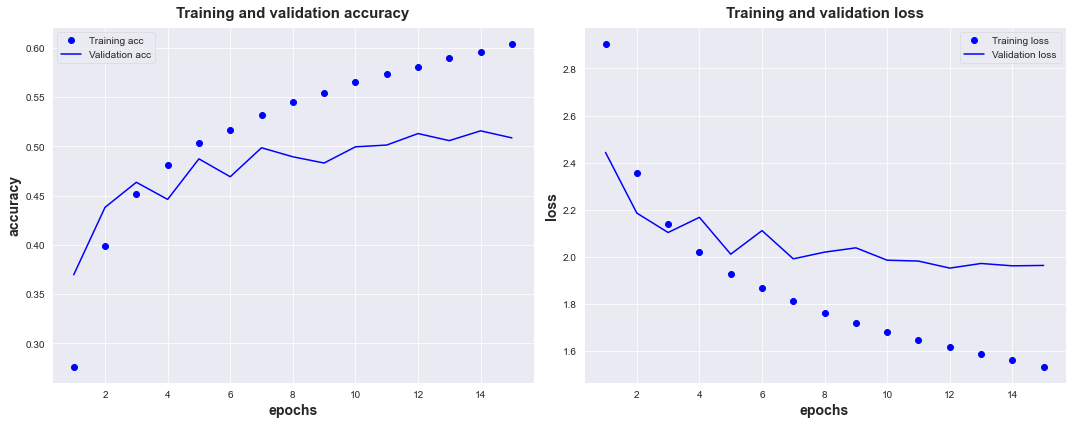

(41905,) (41905,)
[13 13 25 29 13] [13 30 36  3 13]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.02      0.00      0.01       262
           2       0.03      0.01      0.02       900
           3       0.02      0.05      0.03      1134
           4       0.00      0.00      0.00       218
           5       0.03      0.05      0.04      1007
           6       0.01      0.01      0.01       732
           7       0.03      0.00      0.01       220
           8       0.04      0.05      0.04       690
           9       0.00      0.00      0.00       198
          10       0.03      0.02      0.02       296
          11       0.00      0.00      0.00       276
          12       0.02      0.02      0.02      1257
          13       0.22      0.22      0.22      7116
          14       0.00      0.00      0.00       282
          15       0.02      0.02      0.02       505
          16       0.05      

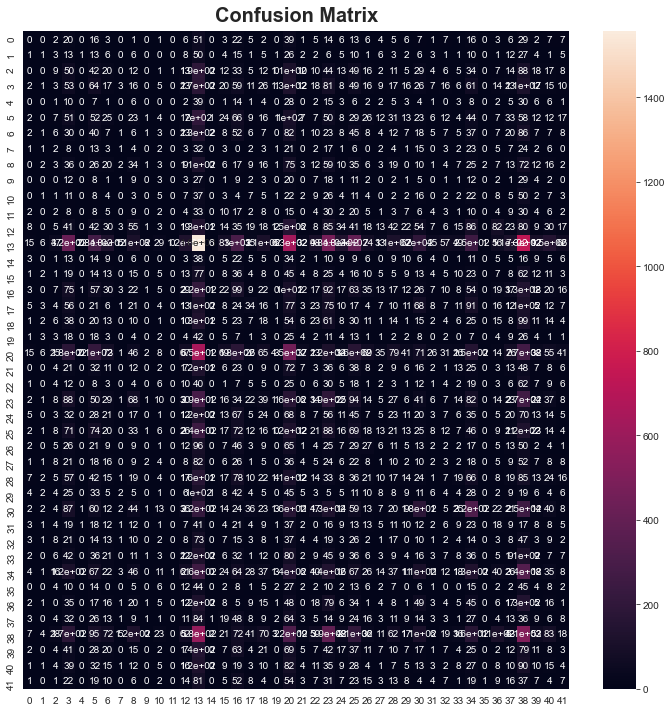

In [41]:
# evalute the model
test_loss, test_acc = modelB.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(historyB)

Y_pred = modelB.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: 0.6043

Best validation accuracy: 0.5157 (epoch 14)

Test accuracy: 0.085

Training time: 28 m 43.1 s

# EXPERIMENT ORDER 1

In [48]:
# ORDER 1 TRAIN DATA
X_train = X1_train
Y_train = Y1_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 1000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 89122


### Model training using embedding layer and RNN 

In [49]:
# basline model using embedding layers and simpleRNN
model1 = Sequential()
model1.add(Embedding(total_words, 70, input_length=maxlen))
model1.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model1.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model1.add(SimpleRNN(32, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(42, activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 70)            6238540   
                                                                 
 bidirectional_6 (Bidirectio  (None, 20, 128)          17280     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 20, 128)          24704     
 nal)                                                            
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 42)               

In [51]:
model1.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history1 = model1.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    shuffle=False
                   )

Epoch 1/15
1048/1048 [==============================] - 121s 108ms/step - loss: 1.5319 - accuracy: 0.5094 - val_loss: 5.5920 - val_accuracy: 0.3120
Epoch 2/15
1048/1048 [==============================] - 106s 101ms/step - loss: 1.3121 - accuracy: 0.5603 - val_loss: 6.3530 - val_accuracy: 0.3117
Epoch 3/15
1048/1048 [==============================] - 104s 99ms/step - loss: 1.2408 - accuracy: 0.5823 - val_loss: 7.2521 - val_accuracy: 0.3182
Epoch 4/15
1048/1048 [==============================] - 99s 95ms/step - loss: 1.1728 - accuracy: 0.6017 - val_loss: 6.9527 - val_accuracy: 0.3235
Epoch 5/15
1048/1048 [==============================] - 99s 95ms/step - loss: 1.1369 - accuracy: 0.6142 - val_loss: 7.1695 - val_accuracy: 0.3174
Epoch 6/15
1048/1048 [==============================] - 97s 93ms/step - loss: 1.0635 - accuracy: 0.6366 - val_loss: 7.3564 - val_accuracy: 0.3237
Epoch 7/15
1048/1048 [==============================] - 98s 94ms/step - loss: 1.0668 - accuracy: 0.6398 - val_loss: 7.5

Test loss and accuracy: 10.125004768371582 0.13093902170658112


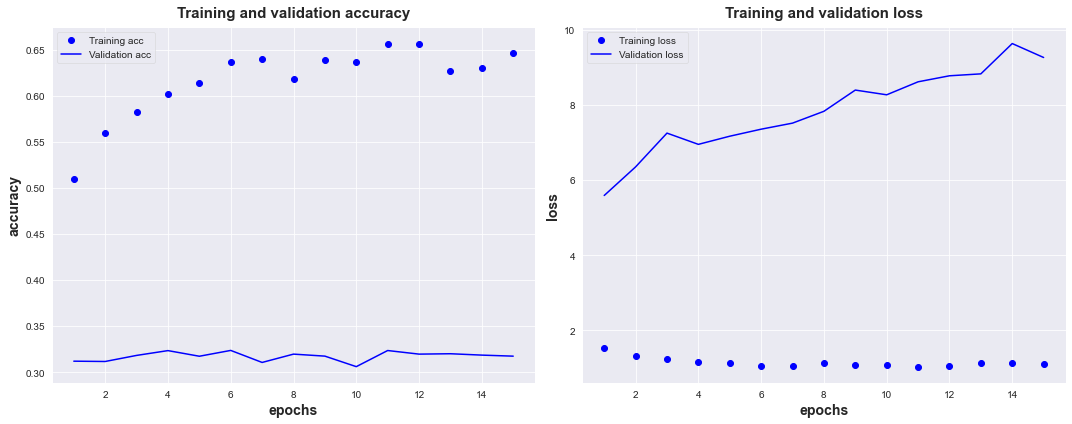

(41905,) (41905,)
[13 13 25 29 13] [33 13 33 41 13]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00      1134
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00      1007
           6       0.00      0.00      0.00       732
           7       0.00      0.00      0.00       220
           8       0.00      0.00      0.00       690
           9       0.00      0.00      0.00       198
          10       0.00      0.00      0.00       296
          11       0.01      0.05      0.02       276
          12       0.00      0.00      0.00      1257
          13       0.18      0.74      0.29      7116
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       505
          16       0.00      

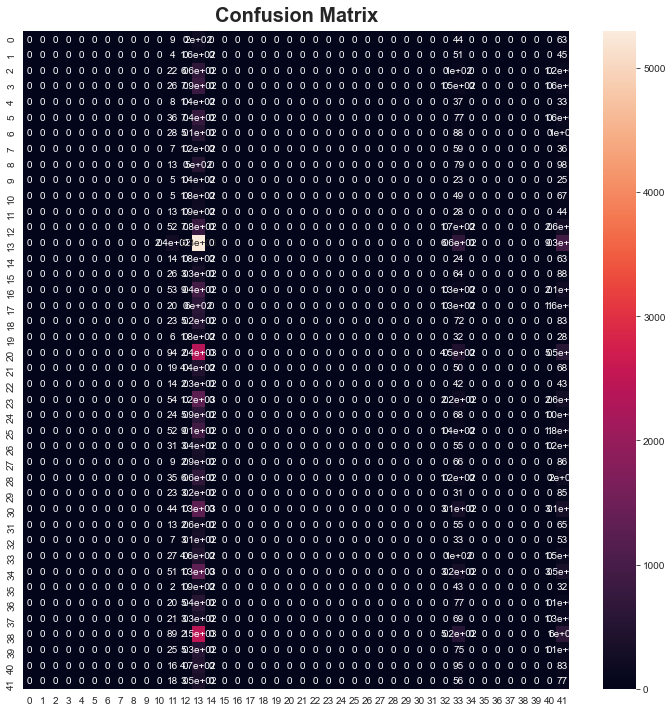

In [52]:
# evalute the model
test_loss, test_acc = model1.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(history1)

Y_pred = model1.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: 0.6570 (epoch 12)

Best validation accuracy: 0.3237 (epoch 6)

Test accuracy: 0.1309

Training time: 36 m 19.2 s

# EXPERIMENT ORDER 2

In [53]:
# ORDER 2 TRAIN DATA
X_train = X2_train
Y_train = Y2_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 93122


### Model training using embedding layer and RNN

In [54]:
# basline model using embedding layers and simpleRNN
model2 = Sequential()
model2.add(Embedding(total_words, 70, input_length=maxlen))
model2.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model2.add(SimpleRNN(32, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(42, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 70)            6518540   
                                                                 
 bidirectional_8 (Bidirectio  (None, 20, 128)          17280     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 20, 128)          24704     
 nal)                                                            
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 42)               

In [55]:
model2.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history2 = model2.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    shuffle=False
                   )

Epoch 1/15
1048/1048 [==============================] - 107s 92ms/step - loss: 1.3905 - accuracy: 0.7307 - val_loss: 4.0170 - val_accuracy: 0.1636
Epoch 2/15
1048/1048 [==============================] - 97s 93ms/step - loss: 1.0586 - accuracy: 0.7826 - val_loss: 4.4635 - val_accuracy: 0.1636
Epoch 3/15
1048/1048 [==============================] - 98s 93ms/step - loss: 0.9236 - accuracy: 0.7962 - val_loss: 4.8095 - val_accuracy: 0.1636
Epoch 4/15
1048/1048 [==============================] - 99s 94ms/step - loss: 0.7805 - accuracy: 0.8225 - val_loss: 4.8867 - val_accuracy: 0.1636
Epoch 5/15
1048/1048 [==============================] - 98s 93ms/step - loss: 0.7485 - accuracy: 0.8253 - val_loss: 5.2580 - val_accuracy: 0.1636
Epoch 6/15
1048/1048 [==============================] - 98s 93ms/step - loss: 0.7530 - accuracy: 0.8139 - val_loss: 5.5659 - val_accuracy: 0.1636
Epoch 7/15
1048/1048 [==============================] - 98s 94ms/step - loss: 0.7344 - accuracy: 0.8143 - val_loss: 5.7243 

Test loss and accuracy: 6.832115650177002 0.0479656383395195


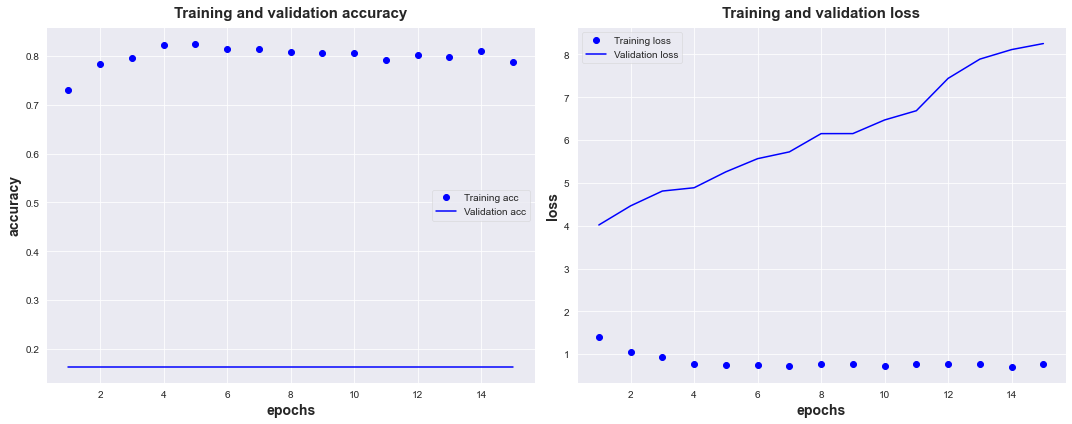

(41905,) (41905,)
[13 13 25 29 13] [34 34 34 34 34]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00      1134
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00      1007
           6       0.00      0.00      0.00       732
           7       0.00      0.00      0.00       220
           8       0.00      0.00      0.00       690
           9       0.00      0.00      0.00       198
          10       0.00      0.00      0.00       296
          11       0.00      0.00      0.00       276
          12       0.00      0.00      0.00      1257
          13       0.00      0.00      0.00      7116
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       505
          16       0.00      

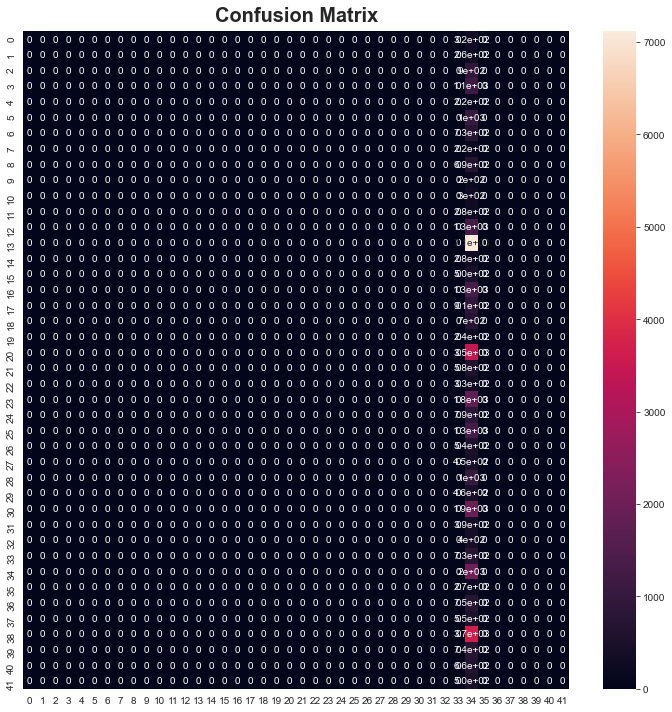

In [58]:
# evalute the model
test_loss, test_acc = model2.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(history2)

Y_pred = model2.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: 0.8253 (epoch 5)

Best validation accuracy: same for 15 epochs, model didn't learn at all - 0.1636

Test accuracy: 0.0752

Training time: 25 m 14.8 s

# EXPERIMENT ORDER 3

In [59]:
# ORDER 3 TRAIN DATA
X_train = X3_train
Y_train = Y3_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 93122


### Model training using embedding layer and RNN

In [60]:
# basline model using embedding layers and simpleRNN
model3 = Sequential()
model3.add(Embedding(total_words, 70, input_length=maxlen))
model3.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model3.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model3.add(SimpleRNN(32, activation='tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(42, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 70)            6518540   
                                                                 
 bidirectional_10 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 42)               

In [61]:
model3.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history3 = model3.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    shuffle=False
                   )

Epoch 1/15
1048/1048 [==============================] - 123s 107ms/step - loss: 1.0948 - accuracy: 0.8001 - val_loss: 4.8660 - val_accuracy: 0.0444
Epoch 2/15
1048/1048 [==============================] - 107s 102ms/step - loss: 0.9461 - accuracy: 0.8027 - val_loss: 5.2010 - val_accuracy: 0.0444
Epoch 3/15
1048/1048 [==============================] - 106s 101ms/step - loss: 0.7182 - accuracy: 0.8474 - val_loss: 6.0033 - val_accuracy: 0.0444
Epoch 4/15
1048/1048 [==============================] - 109s 104ms/step - loss: 0.6604 - accuracy: 0.8422 - val_loss: 6.5475 - val_accuracy: 0.0444
Epoch 5/15
1048/1048 [==============================] - 106s 101ms/step - loss: 0.6162 - accuracy: 0.8597 - val_loss: 7.0755 - val_accuracy: 0.0444
Epoch 6/15
1048/1048 [==============================] - 106s 101ms/step - loss: 0.5606 - accuracy: 0.8659 - val_loss: 7.4572 - val_accuracy: 0.0444
Epoch 7/15
1048/1048 [==============================] - 108s 103ms/step - loss: 0.5419 - accuracy: 0.8712 - val_

Test loss and accuracy: 6.4859490394592285 0.03076005168259144


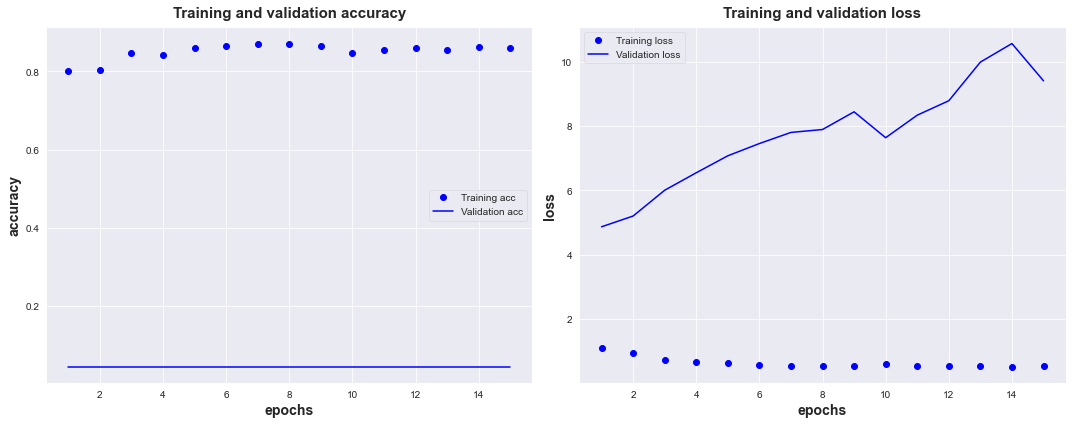

(41905,) (41905,)
[13 13 25 29 13] [25 25 25 25 25]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00      1134
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00      1007
           6       0.00      0.00      0.00       732
           7       0.00      0.00      0.00       220
           8       0.00      0.00      0.00       690
           9       0.00      0.00      0.00       198
          10       0.00      0.00      0.00       296
          11       0.00      0.00      0.00       276
          12       0.00      0.00      0.00      1257
          13       0.00      0.00      0.00      7116
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       505
          16       0.00      

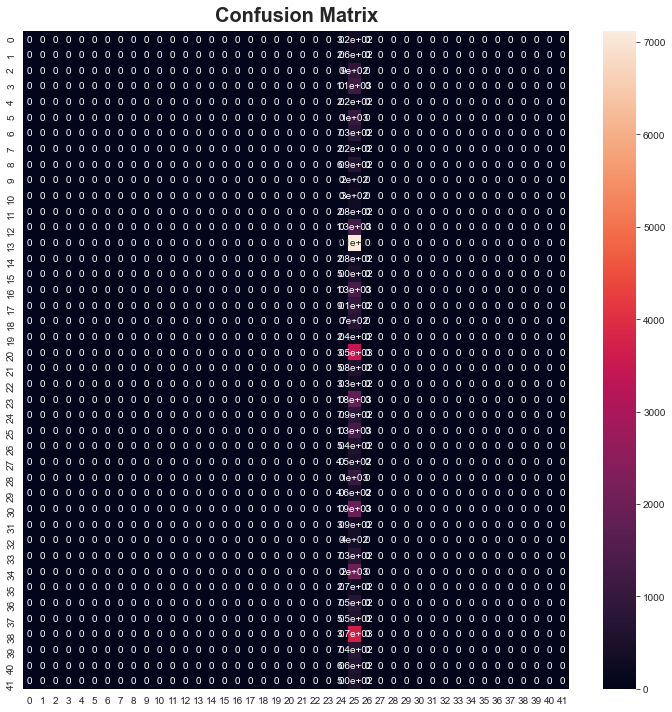

In [64]:
# evalute the model
test_loss, test_acc = model3.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(history3)

Y_pred = model3.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: 0.8712 (epoch 7)

Best validation accuracy: 0.0444 (doesn't change, model doesn't learn)

Test accuracy: 0.0307

Training time: 43 m 35.3 s

# EXPERIMENT ORDER 4

In [65]:
# ORDER 4 TRAIN DATA
X_train = X4_train
Y_train = Y4_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 93122


### Model training using embedding layer and RNN

In [66]:
# basline model using embedding layers and simpleRNN
model4 = Sequential()
model4.add(Embedding(total_words, 70, input_length=maxlen))
model4.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model4.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model4.add(SimpleRNN(32, activation='tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(42, activation='softmax'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 70)            6518540   
                                                                 
 bidirectional_12 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 42)               

In [67]:
model4.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history4 = model4.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    shuffle=False
                   )

Epoch 1/15
1048/1048 [==============================] - 286s 246ms/step - loss: 1.4551 - accuracy: 0.7335 - val_loss: 4.3797 - val_accuracy: 0.0000e+00
Epoch 2/15
1048/1048 [==============================] - 269s 256ms/step - loss: 1.2137 - accuracy: 0.7560 - val_loss: 4.4337 - val_accuracy: 0.0000e+00
Epoch 3/15
1048/1048 [==============================] - 256s 245ms/step - loss: 1.0344 - accuracy: 0.7792 - val_loss: 5.2911 - val_accuracy: 0.0000e+00
Epoch 4/15
1048/1048 [==============================] - 256s 244ms/step - loss: 0.9794 - accuracy: 0.7836 - val_loss: 5.5638 - val_accuracy: 0.0000e+00
Epoch 5/15
1048/1048 [==============================] - 250s 238ms/step - loss: 0.9612 - accuracy: 0.7704 - val_loss: 5.5011 - val_accuracy: 0.0000e+00
Epoch 6/15
1048/1048 [==============================] - 249s 238ms/step - loss: 0.8235 - accuracy: 0.7996 - val_loss: 5.8443 - val_accuracy: 0.0000e+00
Epoch 7/15
1048/1048 [==============================] - 251s 240ms/step - loss: 0.8736 -

Test loss and accuracy: 5.8749165534973145 0.012074931524693966


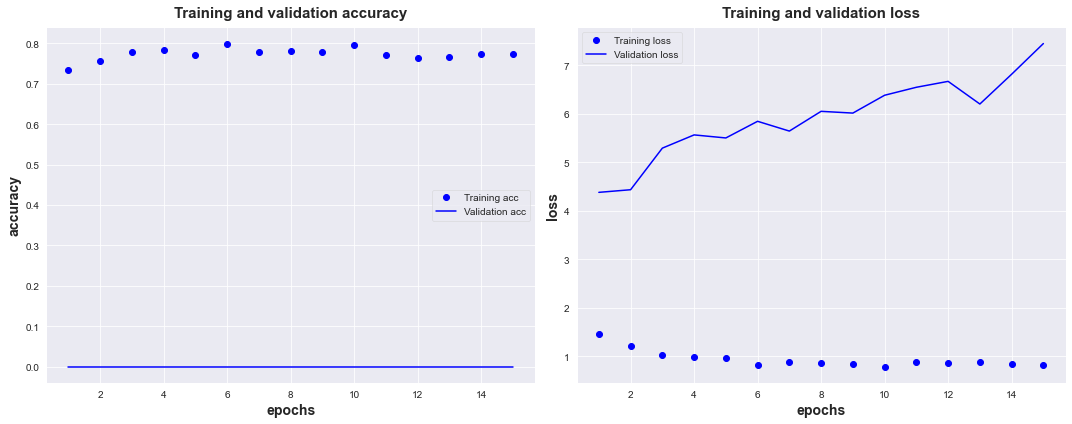

(41905,) (41905,)
[13 13 25 29 13] [41 41 41 41 41]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00      1134
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00      1007
           6       0.00      0.00      0.00       732
           7       0.00      0.00      0.00       220
           8       0.00      0.00      0.00       690
           9       0.00      0.00      0.00       198
          10       0.00      0.00      0.00       296
          11       0.00      0.00      0.00       276
          12       0.00      0.00      0.00      1257
          13       0.00      0.00      0.00      7116
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       505
          16       0.00      

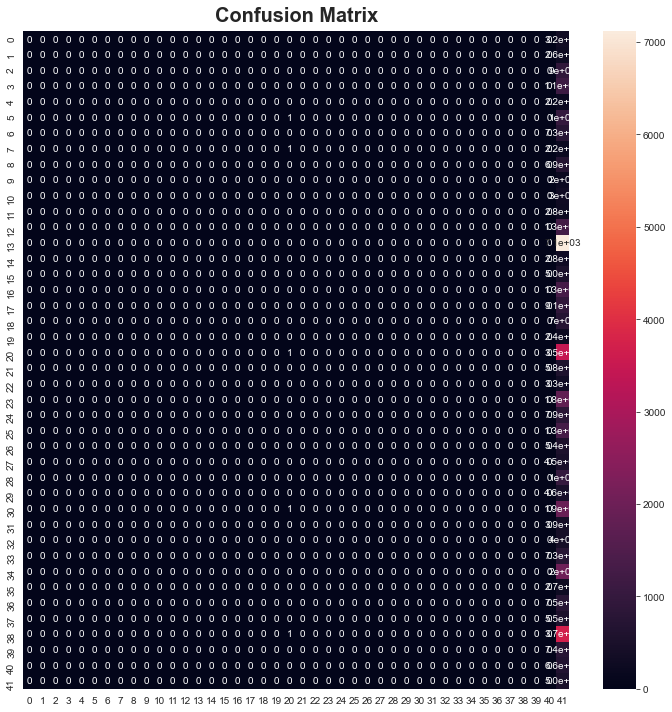

In [70]:
# evalute the model
test_loss, test_acc = model4.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(history4)

Y_pred = model4.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: 0.7996 (epoch 6)

Best validation accuracy: -

Test accuracy: 0.012

Training time: 48 m 39.6 s

# EXPERIMENT ORDER 5

In [71]:
# ORDER 5 TRAIN DATA
X_train = X5_train
Y_train = Y5_train

# one hot encoding using keras tokenizer and pad sequencing
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("shape of input data: ", X_train.shape)
print("shape of target variable: ", Y_train.shape)

tokenizer = Tokenizer(num_words=1000000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

word_index = tokenizer.word_index
max_words = 15000000  # total number of words to consider in embedding layer
total_words = len(word_index) + 5000
maxlen = 20 # max length of sequence 
Y_train = to_categorical(Y_train, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (167616,)
shape of target variable:  (167616,)
Length of word index: 93122


### Model training using embedding layer and RNN

In [72]:
# basline model using embedding layers and simpleRNN
model5 = Sequential()
model5.add(Embedding(total_words, 70, input_length=maxlen))
model5.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model5.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model5.add(SimpleRNN(32, activation='tanh'))
model5.add(Dropout(0.2))
model5.add(Dense(42, activation='softmax'))
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 70)            6518540   
                                                                 
 bidirectional_14 (Bidirecti  (None, 20, 128)          17280     
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 20, 128)          24704     
 onal)                                                           
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 42)               

In [73]:
model5.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
#SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]
callback_list = [earlystopping]

# fit model to the data
history5 = model5.fit(train_padseq, Y_train, 
                   batch_size=128, 
                    epochs=15,
                    validation_split=0.2,
                    shuffle=False
                   )

Epoch 1/15
1048/1048 [==============================] - 108s 95ms/step - loss: 1.1459 - accuracy: 0.7967 - val_loss: 5.1625 - val_accuracy: 0.0444
Epoch 2/15
1048/1048 [==============================] - 99s 94ms/step - loss: 0.7848 - accuracy: 0.8491 - val_loss: 5.7717 - val_accuracy: 0.0444
Epoch 3/15
1048/1048 [==============================] - 111s 106ms/step - loss: 0.6583 - accuracy: 0.8580 - val_loss: 6.1528 - val_accuracy: 0.0444
Epoch 4/15
1048/1048 [==============================] - 119s 114ms/step - loss: 0.6130 - accuracy: 0.8645 - val_loss: 6.5519 - val_accuracy: 0.0444
Epoch 5/15
1048/1048 [==============================] - 106s 101ms/step - loss: 0.5712 - accuracy: 0.8700 - val_loss: 7.1917 - val_accuracy: 0.0444
Epoch 6/15
1048/1048 [==============================] - 111s 106ms/step - loss: 0.5262 - accuracy: 0.8813 - val_loss: 7.3618 - val_accuracy: 0.0444
Epoch 7/15
1048/1048 [==============================] - 111s 106ms/step - loss: 0.5151 - accuracy: 0.8899 - val_los

Test loss and accuracy: 8.069513320922852 0.03076005168259144


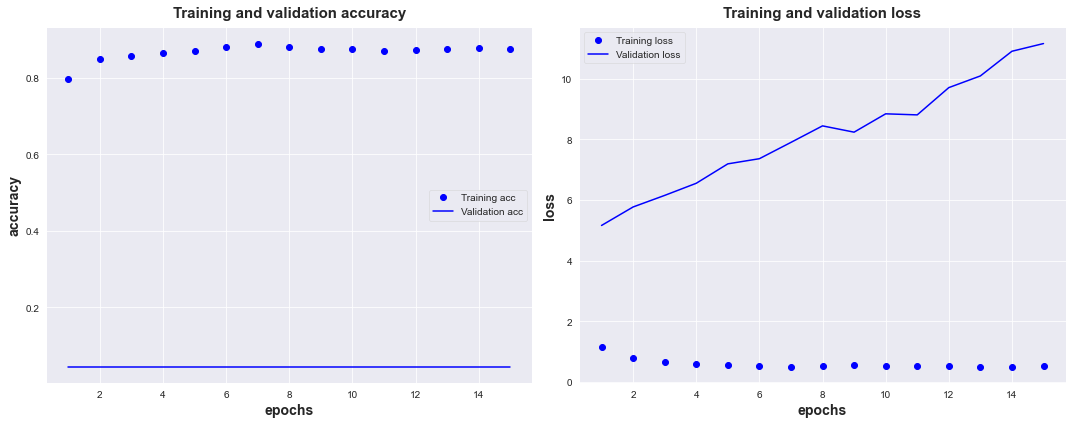

(41905,) (41905,)
[13 13 25 29 13] [25 25 25 25 25]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00      1134
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00      1007
           6       0.00      0.00      0.00       732
           7       0.00      0.00      0.00       220
           8       0.00      0.00      0.00       690
           9       0.00      0.00      0.00       198
          10       0.00      0.00      0.00       296
          11       0.00      0.00      0.00       276
          12       0.00      0.00      0.00      1257
          13       0.00      0.00      0.00      7116
          14       0.00      0.00      0.00       282
          15       0.00      0.00      0.00       505
          16       0.00      

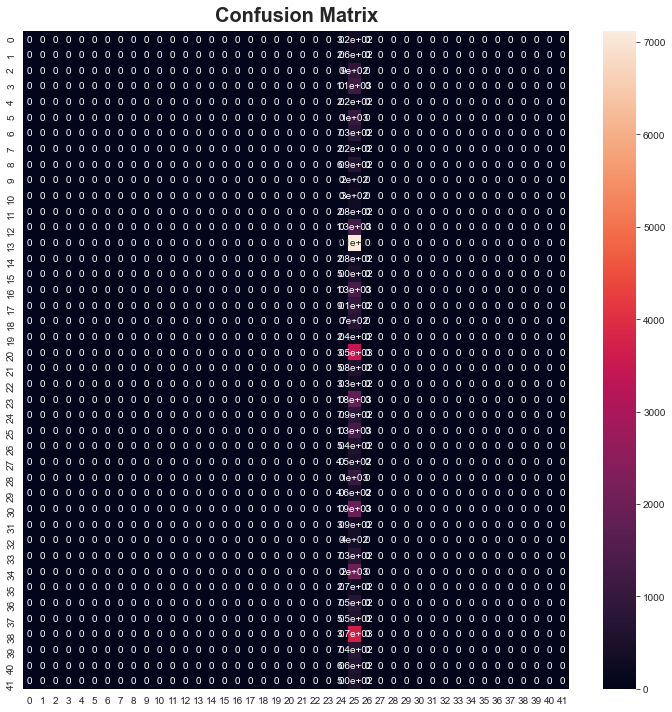

In [76]:
# evalute the model
test_loss, test_acc = model5.evaluate(test_padseq, Y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)

plot_loss_accuracy(history5)

Y_pred = model5.predict(test_padseq)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test = np.argmax(Y_test,axis=1)
print(Y_test.shape, Y_pred.shape)
print(Y_test[:5], Y_pred[:5])

print(classification_report(Y_test, Y_pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True);
plt.title('Confusion Matrix', fontsize=20);

Stopped: NO

Best training accuracy: - doesn't learn

Best validation accuracy: 0.8899 (epoch 7)

Test accuracy: 0.0307

Training time: 26 m 27.2 s